# Loan Paid Back Analysis and Prediction

### Team:
** Franklin Shawn**

**Course:** CISB 60 – ML and DL (Fall, 2024)

### Dataset Variable Description
- credit_policy: Indicates whether the borrower meets the lending institution's credit underwriting criteria (1 = Yes, 0 = No).
- purpose: The purpose of the loan, represented as categorical values such as "debt_consolidation," "credit_card," etc.
- int_rate: The interest rate on the loan.
- installment: The fixed monthly payment to be made by the borrower.
- log_annual_inc: The natural logarithm of the borrower’s self-reported annual income.
- dti: Debt-to-income ratio, calculated as the total monthly debt payments divided by monthly income.
- fico: The borrower’s FICO. credit score
- days_with_cr_line: The number of days the borrower has had a credit line.
- revol_bal: The borrower’s revolving balance (total balance on credit cards and other revolving credit accounts).
- revol_util: Revolving line utilization rate, the amount of credit the borrower is using relative to their credit limit.
- inq_last_6mths: The number of inquiries by lenders in the borrower’s credit report in the last 6 months.
- delinq_2yrs: The number of delinquent credit lines in the borrower’s credit history in the past 2 years.
- pub_rec: The number of derogatory public records (e.g., bankruptcies, tax liens).
- not_fully_paid: A binary variable indicating whether the borrower did not fully pay back the loan (1 = loan was not fully paid, 0 = loan was fully paid).

### Objective of the project
* This project aims to explore the relationship between the several variables and the loan fully paid back result or status within the customers who meet the credit policy by using the logistic regression. By leveraging a dataset of loan attributes,  the project identifies how variations influence the target.
    
    
* **Keywords:**  Data Cleaning, Logistic Regression, Data Analysis, Machine Learning, Feature Selection, Model Evaluation, confusion, accuracy, precision, recall and TensorBoard

### Methodology

1. Explan ML and DL metodology

2. Introduce the topics you used in your project
 * Model 1
    * Logistic Regression in machine learning
    * Logistic regression is a simple, efficient, and interpretable supervised standalone machine learning algorithm for binary classification tasks. It predicts probabilities using the sigmoid function and makes class predictions based on a threshold. 
 
 * Model 2
    * Logistic Regression in deep learning
    * Logistic regression is not a standalone model in deep learning but is often used as the final layer of a neural network for binary classification tasks.
    * The difference between logistic regression as a machine learning model and its use in deep learning primarily lies in the context and scale of application. While the core mathematical concept of logistic regression remains the same.

**Required packages**

* Add instructions to install the required packages


In [1]:
import numpy as np
import pandas as pd
# Import the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import LogisticRegression model and its functions libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# Ignore warnings in Jupyter
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis(EDA)

In [2]:
# Load the data
df= pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [4]:
# Replace the dot in the column names with an underscore
df.columns = df.columns.str.lower().str.replace('.', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace('.', '_')

df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.tail()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [6]:
# Display unique values in the 'purpose' column
unique_values = df['purpose'].unique()
print("Unique values in 'purpose':", unique_values)

Unique values in 'purpose': ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [7]:
# I deliberately did not encode 'all-other' in order to avoid the problem of perfect multicollinearity.
df['debt_consolidation'] = np.where(df['purpose']=='debt_consolidation',1,0)
df['credit_card'] = np.where(df['purpose']=='credit_card',1,0)
df['home_improvement'] = np.where(df['purpose']=='home_improvement',1,0)
df['small_business'] = np.where(df['purpose']=='small_business',1,0)
df['major_purchase'] = np.where(df['purpose']=='major_purchase',1,0)
df['educational'] = np.where(df['purpose']=='educational',1,0)

In [8]:
df

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,debt_consolidation,credit_card,home_improvement,small_business,major_purchase,educational
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,1,0,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,1,0,0,0


In [9]:
df.shape

(9578, 20)

In [10]:
# display a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit_policy       9578 non-null   int64  
 1   purpose             9578 non-null   object 
 2   int_rate            9578 non-null   float64
 3   installment         9578 non-null   float64
 4   log_annual_inc      9578 non-null   float64
 5   dti                 9578 non-null   float64
 6   fico                9578 non-null   int64  
 7   days_with_cr_line   9578 non-null   float64
 8   revol_bal           9578 non-null   int64  
 9   revol_util          9578 non-null   float64
 10  inq_last_6mths      9578 non-null   int64  
 11  delinq_2yrs         9578 non-null   int64  
 12  pub_rec             9578 non-null   int64  
 13  not_fully_paid      9578 non-null   int64  
 14  debt_consolidation  9578 non-null   int32  
 15  credit_card         9578 non-null   int32  
 16  home_i

In [11]:
# get a summary of statistics for numerical columns in df
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,debt_consolidation,credit_card,home_improvement,small_business,major_purchase,educational
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.413134,0.131760,0.065671,0.064627,0.045625,0.035811
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.492422,0.338248,0.247720,0.245880,0.208682,0.185829
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# display all columns
df.columns.tolist()

['credit_policy',
 'purpose',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

In [13]:
# check if there is missing data
df.isnull().sum()

credit_policy         0
purpose               0
int_rate              0
installment           0
log_annual_inc        0
dti                   0
fico                  0
days_with_cr_line     0
revol_bal             0
revol_util            0
inq_last_6mths        0
delinq_2yrs           0
pub_rec               0
not_fully_paid        0
debt_consolidation    0
credit_card           0
home_improvement      0
small_business        0
major_purchase        0
educational           0
dtype: int64

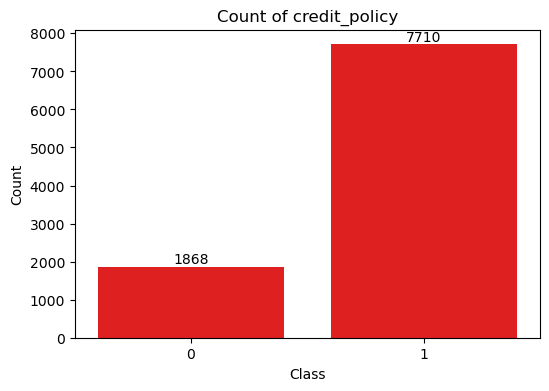

In [14]:
# Create a bar plot that shows the total counts per class value of 'credit_policy'
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='credit_policy', palette=['red'])
# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
#plt.xticks(rotation=0)

# Add labels and title
plt.title('Count of credit_policy')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()

In [15]:
df.groupby('credit_policy')['not_fully_paid'].mean()

credit_policy
0    0.277837
1    0.131518
Name: not_fully_paid, dtype: float64

### This means:
- For customers who did not meet the credit policy (credit_policy = 0), 28% of loans were not fully paid.
- For customers who met the credit policy (credit_policy = 1), 13% of loans were not fully paid.
- So, the custotmers who did not meet the credit policy are more likely not to pay back loans than those who meet the credit policy.

In [16]:
# Calculate the Percentage of customers who meet or not meet the credit policy in 'credit_policy' column
meet = df[df['credit_policy'] == 1]
print(f"Percentage of meeting: {round(100 * len(meet[meet['credit_policy'] == 1]) / len(df), 2)}%")

not_meet = df[df['credit_policy'] == 0]
print(f"Percentage of not meeting: {round(100 * len(not_meet[not_meet['credit_policy'] == 0]) / len(df), 2)}%")


Percentage of meeting: 80.5%
Percentage of not meeting: 19.5%


In [17]:
df.groupby('purpose')['not_fully_paid'].mean()

purpose
all_other             0.166023
credit_card           0.115689
debt_consolidation    0.152388
educational           0.201166
home_improvement      0.170111
major_purchase        0.112128
small_business        0.277868
Name: not_fully_paid, dtype: float64

### This indicates: 
- Loans taken out for small_business have the highest proportion of being not fully paid (27.8%).
- This suggests that loans for small businesses are the riskiest among these purposes.

- Loans taken out for major_purchase and credit_card have the lowest proportion of being not fully paid (11.2%).
- This suggests that loans for major purchases and credit card are relatively safer.

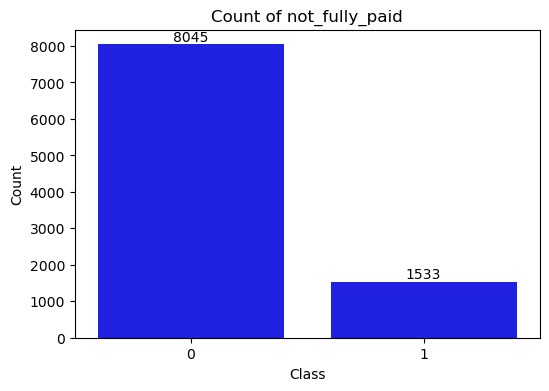

In [18]:
# Create a bar plot that shows the total counts per class value of 'not_fully_paid'
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='not_fully_paid', palette=['blue'])
# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
#plt.xticks(rotation=0)

# Add labels and title
plt.title('Count of not_fully_paid')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()

In [19]:
# Calculate the Percentage of fully paid or not in 'not_fully_paid' column
paid = df[df['not_fully_paid'] == 0]
print(f"Percentage of fully paid: {round(100 * len(paid[paid['not_fully_paid'] == 0]) / len(df), 2)}%")

not_paid = df[df['not_fully_paid'] == 1]
print(f"Percentage of not fully paid: {round(100 * len(not_paid[not_paid['not_fully_paid'] == 1]) / len(df), 2)}%")


Percentage of fully paid: 83.99%
Percentage of not fully paid: 16.01%


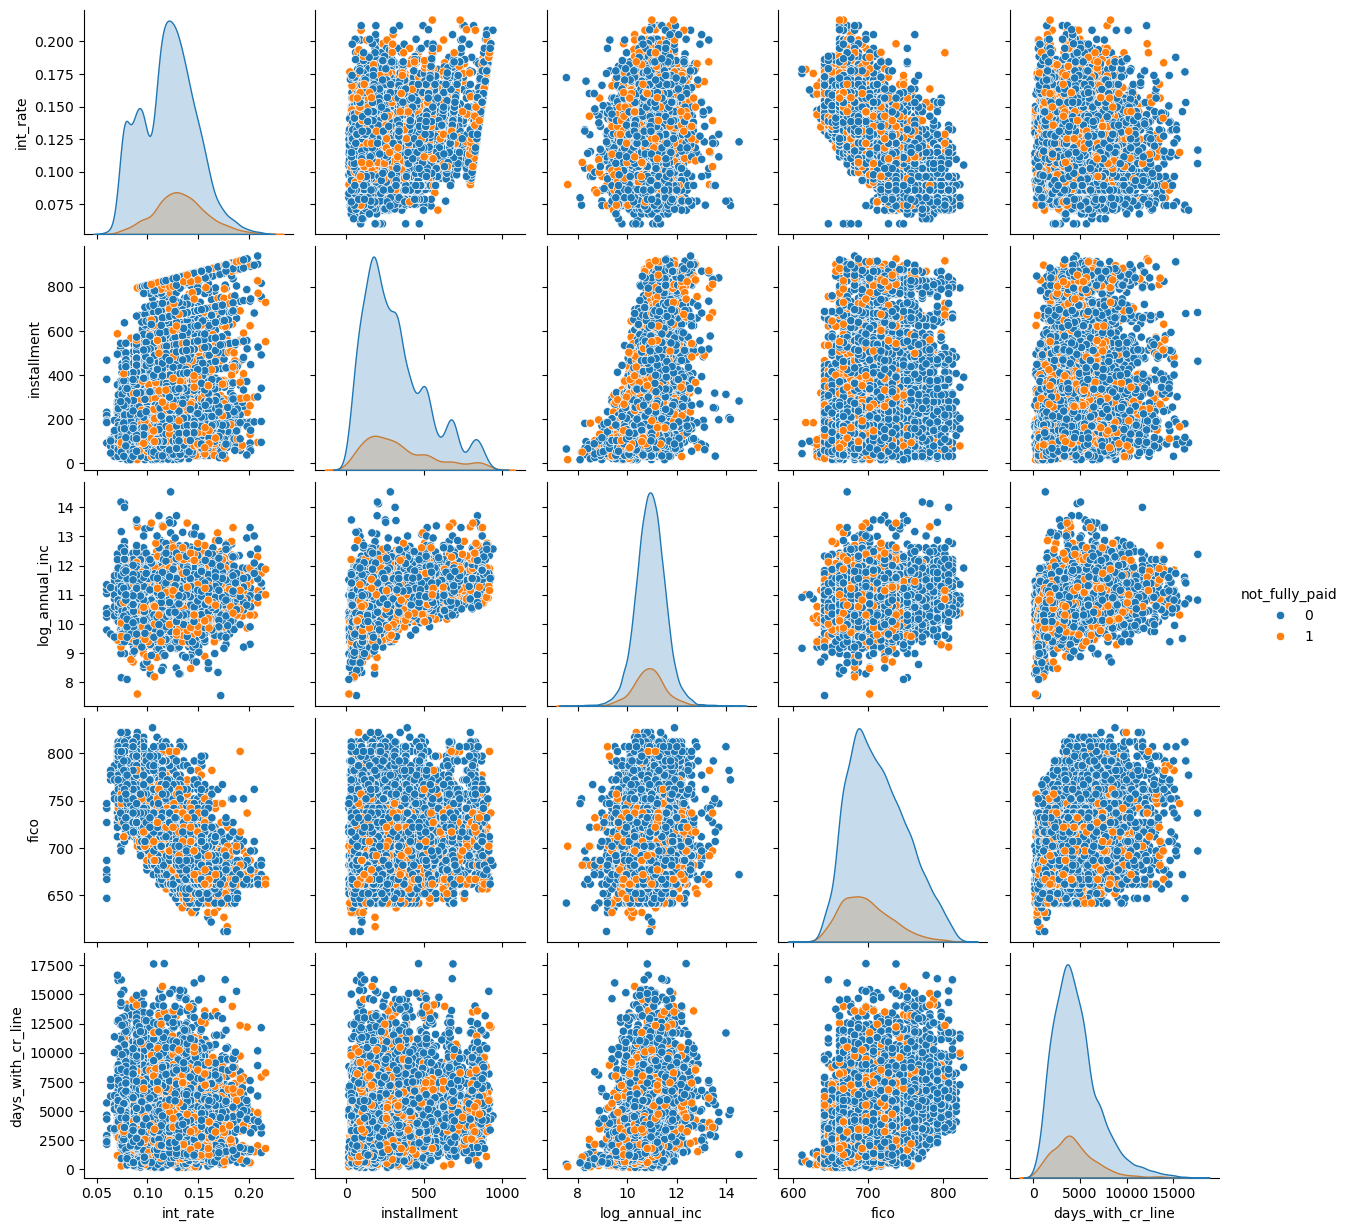

In [20]:
# Create a pairplot that displays the relationships between
['int_rate', 'installment', 'log_annual_inc', 'fico', 'days_with_cr_line', 'not_fully_paid']

# Select the columns
selected_columns = df[['int_rate', 'installment', 'log_annual_inc', 'fico', 'days_with_cr_line', 'not_fully_paid']]
#print(selected_columns)

# Create a pairplot for the selected columns
sns.pairplot(selected_columns, hue='not_fully_paid')
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'int_rate'),
  Text(1.5, 0, 'installment'),
  Text(2.5, 0, 'log_annual_inc'),
  Text(3.5, 0, 'fico'),
  Text(4.5, 0, 'days_with_cr_line'),
  Text(5.5, 0, 'not_fully_paid')])

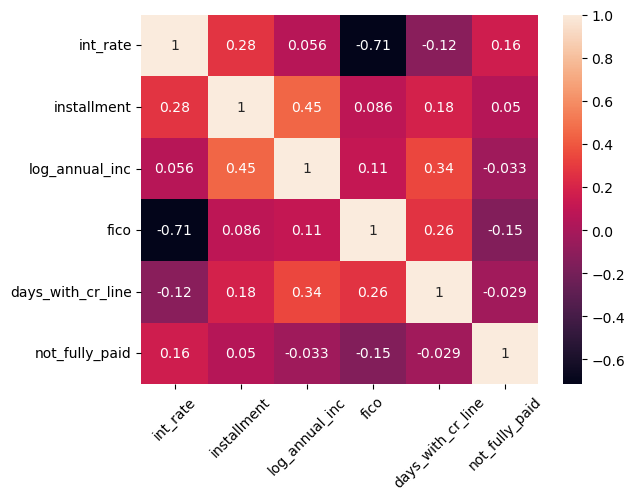

In [21]:
# Create a heatmap that displays the correlation between these columns
sns.heatmap(selected_columns.corr(), annot=True)
# Rotate x-ticks
plt.xticks(rotation=45)

### Correlation values range from -1 to 1
- The score of -0.71 reflects a strong negative correlation between interest rates and FICO scores, confirming that borrowers with higher creditworthiness (higher FICO scores) tend to receive significantly lower interest rates. This aligns with common financial practices and offers insights for both lenders and borrowers.

In [22]:
# remove rows where 'credit_policy' is equal to 0, we just need to analysis the customers who meet the credit policy to make 
# the result more insightful.because those customer who don't meet credit policy are more likely not fully paid back the loan.
dfn = df[df['credit_policy'] != 0]

# Reset the index (optional, for a cleaner dataset)
dfn.reset_index(drop=True, inplace=True)
dfn

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,debt_consolidation,credit_card,home_improvement,small_business,major_purchase,educational
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,home_improvement,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,1,0,0,1,0,0,0
7706,1,small_business,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,1,0,0,0,1,0,0
7707,1,all_other,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,1,0,0,0,0,0,0
7708,1,home_improvement,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,1,0,0,1,0,0,0


### Methodology

1. Explan ML and DL metodology

2. Introduce the topics you used in your project
 * Model 1
    * Logistic Regression in machine learning
    * Logistic regression is a simple, efficient, and interpretable supervised standalone machine learning algorithm for binary classification tasks. It predicts probabilities using the sigmoid function and makes class predictions based on a threshold. 
 
 * Model 2
    * Logistic Regression in deep learning
    * Logistic regression is not a standalone model in deep learning but is often used as the final layer of a neural network for binary classification tasks.
    * The difference between logistic regression as a machine learning model and its use in deep learning primarily lies in the context and scale of application. While the core mathematical concept of logistic regression remains the same.

## Machine Learning Section


In [23]:
# Select relevant columns
dfn = dfn[['log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'not_fully_paid',
           'debt_consolidation', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'educational']]

# Separate the features from the labels into X and y, Define features (X) and target (y)
X = dfn[['log_annual_inc', 'dti', 'fico','days_with_cr_line', 'revol_bal', 'revol_util', 
         'debt_consolidation', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'educational']]  # Predictor
y = dfn['not_fully_paid']            # Target

In [24]:
# Perform a train test split on the data, with test size of 30% and random_state of 102
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [26]:
# split the training set into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [27]:
# Display the sizes of the datasets
print(f"Number of training samples: {len(X_train)}")
print(f"Number of validation samples: {len(X_validate)}")
print(f"Number of test samples: {len(X_test)}")

Number of training samples: 4317
Number of validation samples: 1080
Number of test samples: 2313


In [28]:
# Create and Fit a Logistic Regression model

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Get The model's coefficients and print the values
logistic_model.coef_

array([[ 9.41943743e-02,  1.14902399e-02, -4.48068879e-03,
        -3.02404052e-05, -4.23599008e-07,  6.45088025e-03,
        -3.37612428e-01, -4.30296370e-01,  1.86353963e-01,
         5.87325587e-01, -1.35480849e-01,  1.31283836e-01]])

### TASK: Create a visualization of the coefficients by using a barplot of their values and sort the plot.

In [30]:
# Get the coefficients
coefficients = logistic_model.coef_.flatten()

# Create a DataFrame for the coefficients
coef_dfn = pd.DataFrame({'Feature': X.columns,'Coefficient': coefficients})

# Sort the coefficients by their values
coef_dfn_sorted = coef_dfn.sort_values(by='Coefficient', ascending=True)


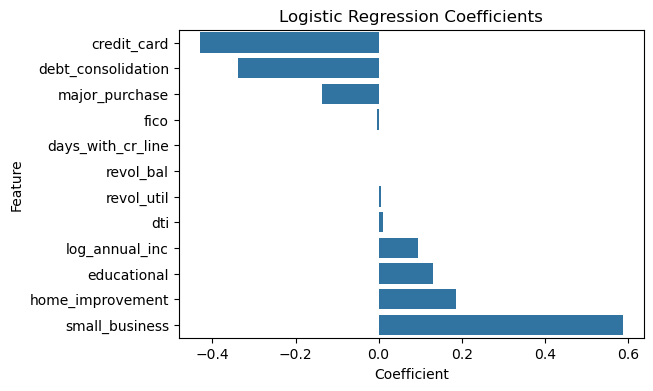

In [31]:
# Create a barplot of the coefficients
plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=coef_dfn_sorted)
plt.title('Logistic Regression Coefficients')
plt.show()

### Explanation
### Cred Card
- A negative coefficient means that loans taken out for the purpose of credit cards are less likely to result in "not fully paid". Borrowers using loans for credit card purposes are less risky.These loans likely have higher repayment rates compared to other loan purposes.Lenders may view loans for credit card purposes as relatively safer.

### Small Business
- A positive coefficient means that loans taken out for small businesses are more likely to result in "not fully paid". Borrowers using loans for small businesses are riskier.These loans likely have higher default rates compared to other purposes. Lenders may charge higher interest rates for small business loans to compensate for the increased risk or impose stricter conditions.

### Model Performance Evaluation
**TASK: Evaluate the model on the remaining 20% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report
* Precision-Recall Curve
* ROC Curve

In [32]:
# make Predictions and create Confusion Matrix array
y_pred = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1999    0]
 [ 314    0]]


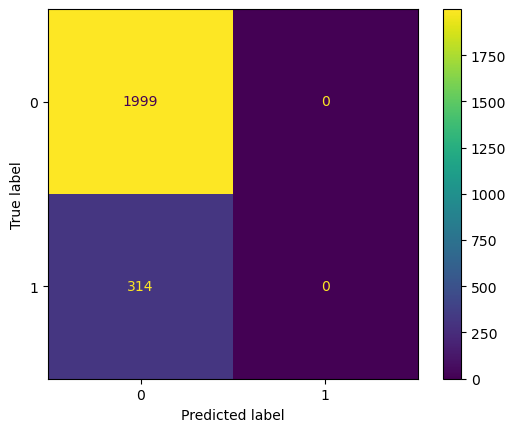

In [33]:
# Create Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot()

### Structure of the Confusion Matrix
** A confusion matrix for binary classification looks like this:**

- Predicted: 0	  /   Predicted: 1
- Actual: 0	True Negatives (TN)	    /    False Positives (FP)
- Actual: 1	False Negatives (FN)	/    True Positives (TP)
#### Where:
- True Negatives (TN): 1347  | The model correctly predicted 0 for 1347 samples that are actually 0.
- False Positives (FP): 0    | The model never incorrectly predicted 1 for samples that are actually 0.
- False Negatives (FN): 195  | The model incorrectly predicted 0 for 195 samples that are actually 1.
- True Positives (TP): 0     | The model never correctly predicted 1 for samples that are actually 1.
### Key Observations
** No Positive Predictions:
- The entire second column (Predicted: 1) contains only zeros, meaning the model never predicted the positive class (1) for any sample.
** High False Negatives:
- There are 195 false negatives, meaning the model misclassified all 1s as 0s.
** Perfect for Class 0:
- The model performs perfectly on the negative class (0), with all 1347 true negatives and no false positives.

In [34]:
# Print  the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      1999
           1       0.00      0.00      0.00       314

    accuracy                           0.86      2313
   macro avg       0.43      0.50      0.46      2313
weighted avg       0.75      0.86      0.80      2313



### Precision and Recall:
- Precision for class 1: Undefined (0 means no positive predictions).
- Recall for class 1: 0 means very poor recall.
### Conclusion:
- The confusion matrix highlights that the model has significant issues predicting the positive class (1). It may perform well on the negative class (0), but its inability to predict any positives suggests problems like class imbalance, poor feature representation, or suboptimal thresholding.

### Performance Curves¶
#### TASK: Create both the Precision Recall Curve and the ROC Curve.

In [35]:
# Import required libraries: precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import precision_recall_curve  # For generating precision-recall curve data
from sklearn.metrics import roc_curve, auc  # For generating ROC curve data and calculating AUC

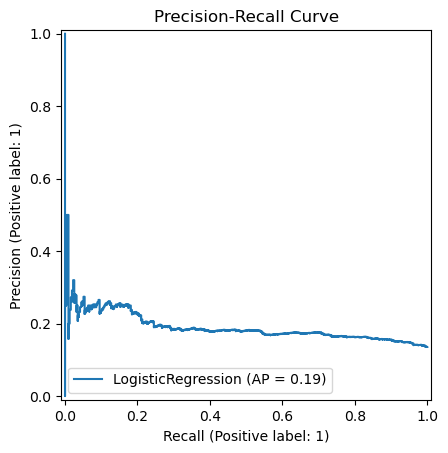

In [36]:
# Create the precision recall curve 
PrecisionRecallDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

### Interpretation of the Curve
** Performance Overview:
- The curve shows the trade-off between precision and recall for the logistic regression model.
- A good model will have a curve that stays in the upper-right region (high precision and high recall).
** Low Precision:
- The precision values are quite low, starting below 0.2 and generally staying under this level.
- This suggests a high number of false positives relative to true positives.
** Decent Recall:
- The recall starts at 1.0 (all samples are classified as positive) and decreases as the threshold increases.
- The model does identify many positive cases (good recall), but the low precision indicates that it does so at the cost of many false positives.
** Average Precision (AP = 0.16):
- The AP score is the area under the PR curve. It summarizes the model's ability to balance precision and recall across all thresholds.
- An AP of 0.16 is relatively poor, suggesting the model struggles to achieve both high precision and high recall.
### Conclusion
- The PR curve indicates that the logistic regression model has poor performance, especially with precision, as reflected by the Average Precision (AP) = 0.16. To improve the model, consider addressing class imbalance, refining features, or trying more advanced methods to better balance precision and recall.

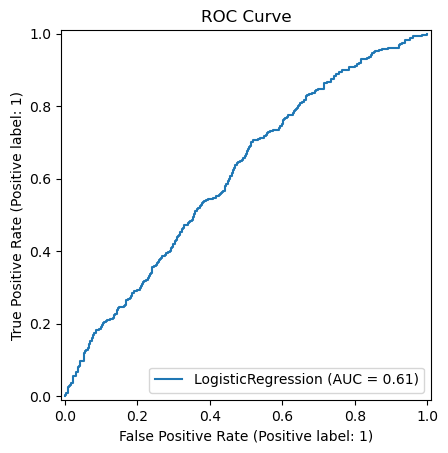

In [37]:
# Plot the ROC Curve
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

### Interpretation of the Curve
** Diagonal Shape:
- The ROC curve is close to the diagonal line (random classifier line), which represents a model with no discriminatory power.
- This indicates that the model is only slightly better than random guessing.

** Area Under the Curve (AUC = 0.56):
- AUC summarizes the model's overall ability to distinguish between positive and negative classes.
- AUC ranges from 0.5 to 1 means a random model with no skill to a perfect model, So, an AUC of 0.56 is just slightly better than random, indicating poor model performance.
### Conclusion
- The ROC curve indicates that the logistic regression model performs poorly, with an AUC = 0.56, only slightly better than random guessing. To improve performance, focus on addressing data issues, improving feature quality, and considering alternative algorithms.

## Clear any logs from previous runs

In [38]:
import os
import shutil

# shutil module is part of the Python standard library and provides a 
# collection of utility functions for working with files and directories. 

folder_path = "logs/"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")


The folder 'logs/' has been deleted.


In [39]:
# Delete the ".tensorboard-info" directory 

folder_path = "C:/Users/userAdmin/AppData/Local/Temp/.tensorboard-info/"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'C:/Users/userAdmin/AppData/Local/Temp/.tensorboard-info/' has been deleted.


# Deep Learning Section

In [40]:
# import the required libraries in Tensorflow/Keras framwork
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import TensorBoard
from tensorflow.keras.callbacks import TensorBoard
import datetime
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [41]:
# print the current tensorflow version
print('Tensorflow version', tf.__version__)

Tensorflow version 2.18.0


In [42]:
# Select relevant columns
dfn = dfn[['log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'not_fully_paid',
           'debt_consolidation', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'educational']]

# Separate the features from the labels into X and y, Define features (X) and target (y)
X = dfn[['log_annual_inc', 'dti', 'fico','days_with_cr_line', 'revol_bal', 'revol_util', 
         'debt_consolidation', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'educational']]  # Predictor
y = dfn['not_fully_paid']    # target

In [43]:
# Perform a train test split on the data, with test size of 20% and random_state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# split the training set into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
X.shape, y.shape

((7710, 12), (7710,))

In [46]:
X_train.shape, y_train.shape

((4934, 12), (4934,))

In [47]:
X_validate.shape, y_validate.shape

((1234, 12), (1234,))

In [48]:
import tensorflow as tf
import os
import datetime
from tensorflow.keras.callbacks import TensorBoard

# Create a log Directory for TensorBoard logs
log_dir = os.path.join("logs", "fit")


In [49]:
# Define the model with its structure
def create_model():
    return tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TensorBoard log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard callback
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7033 - loss: 365.6676 - val_accuracy: 0.8735 - val_loss: 138.1128
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 185.5717 - val_accuracy: 0.8735 - val_loss: 92.6122
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 174.4221 - val_accuracy: 0.8735 - val_loss: 86.8090
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7728 - loss: 98.3676 - val_accuracy: 0.8735 - val_loss: 54.1657
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 84.5389 - val_accuracy: 0.8735 - val_loss: 33.9490
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 54.8628 - val_accuracy: 0.8722 - val_loss: 19.2176
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 39.5126 - val_accuracy: 0.8722 - val_loss: 18.9728
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7790 - loss: 22.1343

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

In [51]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.4014
Test Loss: 0.3895450532436371
Test Accuracy: 0.8735408782958984


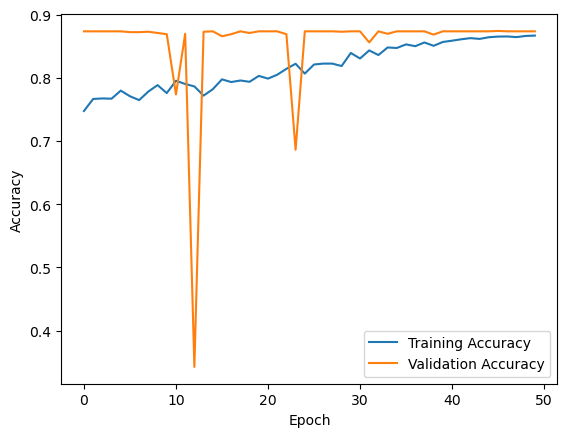

In [52]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Key Observations
** Training Accuracy (Blue Line):
- The training accuracy improves gradually over time, showing a smooth upward trend as the model learns from the training data.
- There is no significant drop or fluctuation, which is expected behavior for a well-behaved training process.

** Validation Accuracy (Orange Line):
- The validation accuracy shows unusual behavior;
- Initially, it is higher than training accuracy (which can happen for a small dataset or certain regularization techniques).
- Around epoch 12, there’s a sharp drop in validation accuracy to a very low value (possibly caused by data issues or instability during training).
- After epoch 23, the validation accuracy recovers and starts aligning with training accuracy, improving consistently and stabilizing near the end.

### General Observations About Training and Validation Accuracy
** Consistent Accuracy:
- Towards the end (epochs 30-50), the training and validation accuracies align, indicating that the model is generalizing well to unseen data.

** Overfitting is Not Apparent:
- Validation accuracy does not degrade significantly compared to training accuracy, suggesting no major overfitting.

### Conclusion
- The training and validation accuracies eventually stabilize, indicating good generalization.
- The sharp drop in validation accuracy around epoch 15 suggests possible instability or anomalies in training/validation data or learning rate issues.
- With proper adjustments to hyperparameters, validation data handling, and regularization, this instability can be minimized.

In [53]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_probs > 0.5).astype(int)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [54]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1347    0]
 [ 195    0]]


In [55]:
# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1347
           1       0.00      0.00      0.00       195

    accuracy                           0.87      1542
   macro avg       0.44      0.50      0.47      1542
weighted avg       0.76      0.87      0.81      1542



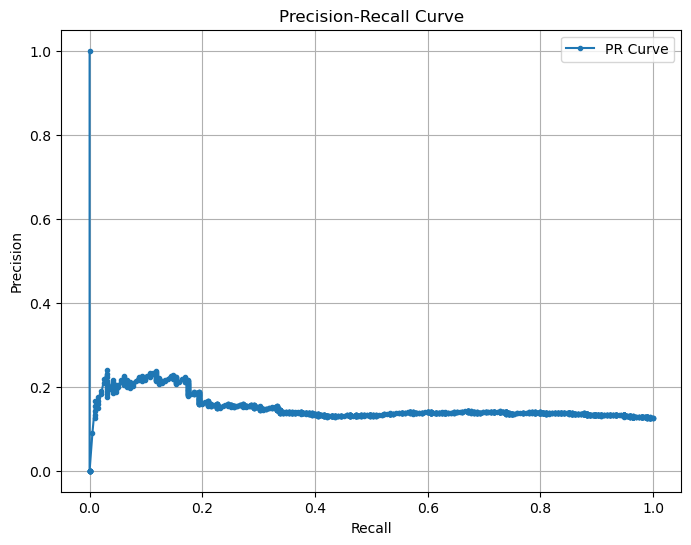

In [56]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

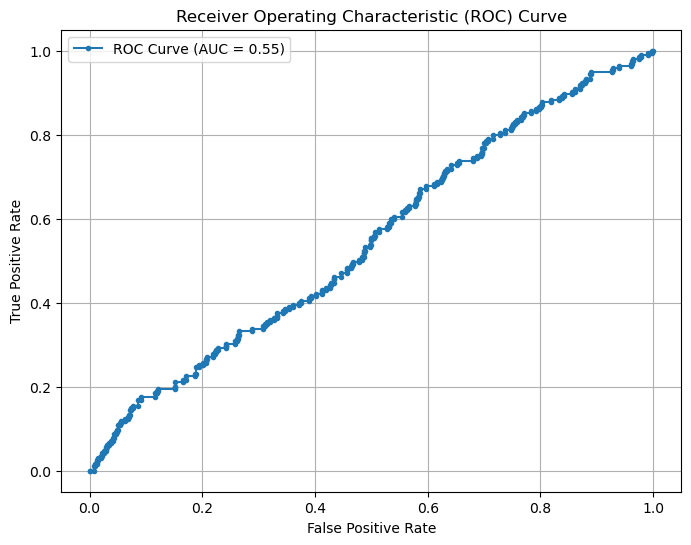

In [57]:
 # Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

### Two Models Comparision
** Now we can find that the classification report, Precision-Recall Curve, and ROC Curve are almost the same between the logistic regression machine learning model and its deep learning implementation, it indicates that the two models are performing very similarly. 

### Possible Causes
- If the dataset has linearly separable data or the relationships between the features and the target variable are inherently linear, a logistic regression model is sufficient. Adding layers in a deep learning model won't significantly improve performance since the problem doesn't require modeling non-linearities.
- Deep learning models are typically used for complex problems (e.g., image recognition, natural language processing) that require non-linear representations.If the problem is simple and doesn't require complex feature extraction or non-linear decision boundaries, the deep learning model's added complexity is unnecessary and doesn't yield better results.
- Since the deep learning model performs similarly to the logistic regression model, it suggests that the deep learning model Was not overfitting, which could happen when using complex architectures on simple data. 

### Examples of Situations Where This Occurs
- Structured Data: Logistic regression often performs as well as deep learning models for tabular datasets with simple relationships (e.g., credit scoring, medical diagnosis).
- Linearly Separable Problems: If the classes are well-separated in the feature space by a linear boundary, adding complexity doesn't improve results.
- Small Datasets: With limited data, deep learning models may not have enough information to justify their complexity, leading to similar performance as logistic regression.

## Summary and Conclusion
#### The similar performance between the logistic regression machine learning model and its deep learning counterpart suggests that the problem is simple, linear, or well-suited for logistic regression. In such cases, using logistic regression is often preferable due to its simplicity, interpretability, and lower computational requirements. Deep learning models offer no significant advantage unless the problem involves non-linear or high-dimensional complexities.

In [ ]:
# Launch TensorBoard
# Command: tensorboard --logdir=logs/fit

In [ ]:
# End of Project